In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pathlib

BATCH_SIZE = 32
IMG_SIZE = (180, 180)
EPOCHS = 15
SEED = 123


In [ ]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True
)

data_dir = pathlib.Path(flowers_root) / "flower_photos"
print("Dataset dir:", data_dir)


Dataset dir: C:\Users\DELL\.keras\datasets\flower_photos\flower_photos


In [25]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names, "| num_classes =", num_classes)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'] | num_classes = 5


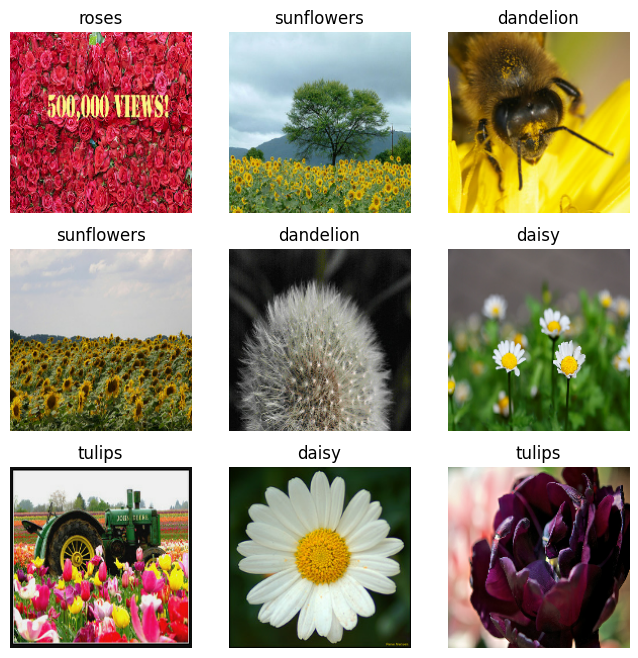

In [26]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
plt.show()


In [27]:
AUTOTUNE = tf.data.AUTOTUNE

normalization_layer = layers.Rescaling(1./255)

def add_norm(ds):
    return ds.map(lambda x, y: (normalization_layer(x), y),
                  num_parallel_calls=AUTOTUNE)

train_ds = add_norm(train_ds).cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = add_norm(val_ds).cache().prefetch(AUTOTUNE)


In [28]:
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=IMG_SIZE + (3,)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,621 (25.36 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [30]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)


Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.4516 - loss: 1.3288 - val_accuracy: 0.5967 - val_loss: 1.0358
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.6366 - loss: 0.9417 - val_accuracy: 0.6267 - val_loss: 0.9303
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.7129 - loss: 0.7637 - val_accuracy: 0.6444 - val_loss: 0.9352
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.7963 - loss: 0.5545 - val_accuracy: 0.6376 - val_loss: 0.9394
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 451ms/step - accuracy: 0.8798 - loss: 0.3563 - val_accuracy: 0.6512 - val_loss: 1.1932
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 679ms/step - accuracy: 0.9203 - loss: 0.2336 - val_accuracy: 0.6213 - val_loss: 1.2855
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 37s 404ms/step - accuracy: 0.9622 - loss: 0.1232 - val_accuracy: 0.6362 - val_loss: 1.5211
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 55s 602ms/step - accuracy: 0.9755 - loss: 0.0787 - val_accuracy: 0.6

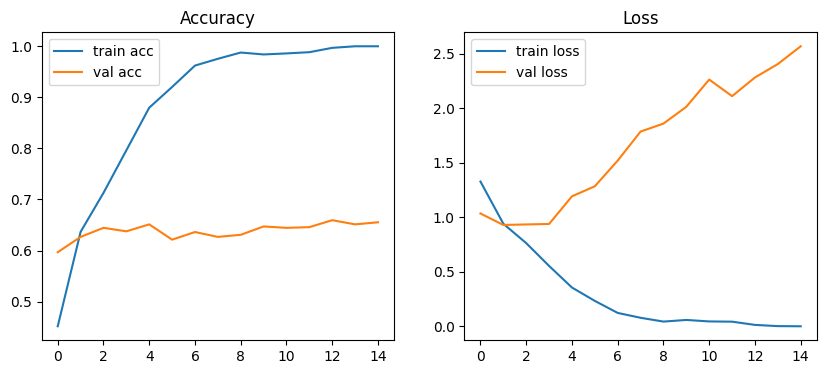

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='train acc')
plt.plot(epochs_range, val_acc, label='val acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='train loss')
plt.plot(epochs_range, val_loss, label='val loss')
plt.legend()
plt.title('Loss')
plt.show()


In [32]:
eval_res = model.evaluate(val_ds, verbose=0)
print(f"Validation — loss: {eval_res[0]:.4f} | acc: {eval_res[1]:.4f}")


Validation — loss: 2.5700 | acc: 0.6553
